In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# set display
pd.set_option("display.max_columns", None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# data dumb store
import joblib

## To be reminded

### **Machine Learning Workflow** 

#### 1. <font color='blue'> Importing Data to Python</font>
    * Data description, Importing data
#### 2. <font color='blue'> Exploratory Data Analysis:</font>
    * Descriptive Statistics, Missing values checking, Outlier Checking, Data exploration
#### 3. <font color='blue'> Preprocessing:</font>
    * Missing values handling, outliers handling
#### 4. <font color='blue'> Modelling :</font>
    * Data Spliting, Model Fitting, Evaluation
#### 5. <font color='blue'> Lift Chart & Interpretation:</font>
    * Targeting customer churn, coefficient interpretation (yang ini belum pasti)
    

# 3.2 Importing Data
---

In [2]:
x_train = joblib.load("data split/x_train.pkl")
y_train = joblib.load("data split/y_train.pkl")

In [3]:
eda_x = x_train.copy()
eda_y = y_train.copy()

eda = pd.concat([eda_x,eda_y],axis=1)

In [4]:
eda.shape

(5455, 96)

# 4. Exploratory Data Analytics
---

In [5]:
#check null value
eda.isnull().sum().sort_values(ascending=False)

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 Current Asset Turnover Rate                                0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
                                                           ..
 Net Value Growth Rate                                      0
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
Bankrupt?                                                   0
Length: 96, dtype: int64

- We dont have any missing values, so we don't need to handling anything

In [6]:
# check duplicated
print(f"Number of duplicated data: {eda.duplicated().sum()}")

Number of duplicated data: 0


## 4.1 Descriptive Statistics
---

In [7]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,5455.0,0.504447,0.060354,0.024277,0.476113,0.502121,0.534612,1.000000
ROA(A) before interest and % after tax,5455.0,0.557818,0.065355,0.000000,0.535379,0.559365,0.587958,1.000000
ROA(B) before interest and depreciation after tax,5455.0,0.552946,0.061401,0.033514,0.527143,0.551689,0.582740,1.000000
Operating Gross Margin,5455.0,0.607765,0.017047,0.000000,0.600473,0.605983,0.613817,0.665151
Realized Sales Gross Margin,5455.0,0.607742,0.017028,0.000000,0.600463,0.605918,0.613694,0.666023
...,...,...,...,...,...,...,...,...
Degree of Financial Leverage (DFL),5455.0,0.027642,0.017378,0.000000,0.026791,0.026809,0.026916,1.000000
Interest Coverage Ratio (Interest expense to EBIT),5455.0,0.565302,0.014320,0.000000,0.565158,0.565254,0.565732,1.000000
Net Income Flag,5455.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Equity to Liability,5455.0,0.047430,0.049044,0.000000,0.024450,0.033802,0.052858,1.000000


- There is a lot of features who valued spare from 0 to 1, but not binary
- We could do a scaling for other features who doesn't have the same value

## 4.2 Future Selection
---

In [8]:
from sklearn.feature_selection import SelectKBest,f_classif 

#Spliting the data into variable inputs and variable outputs
y = eda['Bankrupt?']
x = eda.drop('Bankrupt?',axis=1)

In [9]:
#Select the top 25 features with anova method
anova_filter = SelectKBest(f_classif,k=25)

In [10]:
anova_filter.fit(x,y)

SelectKBest(k=25)

In [11]:
cols= anova_filter.get_support(indices=True)

In [12]:
#Filter the columns with a result from anova features selection
x_feat = x.iloc[:,cols]

In [13]:
x_feat

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
318,0.493784,0.550153,0.544622,0.200919,0.200919,0.200919,0.221424,0.097956,0.176998,0.054479,0.945521,0.369637,0.097652,0.175145,0.788318,0.048699,0.733835,0.327756,0.932937,0.012305,0.327756,0.025832,0.806631,0.840649,0.276281
5796,0.534393,0.590765,0.573425,0.195946,0.195946,0.195946,0.249031,0.135412,0.206749,0.160474,0.839526,0.375230,0.135424,0.205822,0.853149,0.132502,0.741153,0.333800,0.942162,0.017890,0.333800,0.025795,0.827723,0.843248,0.282615
4454,0.526398,0.586895,0.566519,0.187898,0.187898,0.187898,0.230689,0.110903,0.188898,0.064456,0.935544,0.369637,0.110077,0.187218,0.835867,0.051387,0.736437,0.327916,0.941995,0.011238,0.327916,0.016805,0.828627,0.841982,0.276632
2225,0.469702,0.536851,0.521066,0.183052,0.183052,0.183052,0.216413,0.096979,0.172102,0.170723,0.829277,0.372887,0.096943,0.171141,0.838999,0.178165,0.740521,0.337248,0.935162,0.009103,0.337248,0.030998,0.797846,0.840248,0.283786
3249,0.391557,0.443197,0.432464,0.162151,0.162151,0.162151,0.202609,0.084684,0.157114,0.014149,0.985851,0.369637,0.084632,0.160312,0.910421,0.018513,0.738884,0.326690,0.917002,0.037158,0.326690,0.004359,0.756573,0.838115,0.275114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.563890,0.593501,0.237832,0.237832,0.237832,0.239576,0.117499,0.191459,0.150316,0.849684,0.375922,0.117511,0.189759,0.757246,0.080693,0.732480,0.330503,0.942843,0.007798,0.330503,0.044215,0.811639,0.841515,0.281613
1078,0.481597,0.528129,0.530007,0.176942,0.176942,0.176942,0.217548,0.099340,0.168261,0.156937,0.843063,0.381245,0.099150,0.167363,0.780239,0.061053,0.734524,0.329607,0.930064,0.016011,0.329607,0.031261,0.791904,0.839643,0.282249
6687,0.622288,0.707697,0.689330,0.290885,0.290885,0.290885,0.316347,0.090546,0.254651,0.025456,0.974544,0.369637,0.090543,0.250486,0.807288,0.009658,0.734492,0.326456,0.966794,0.007911,0.326456,0.006380,0.875503,0.844092,0.275407
2623,0.586847,0.642172,0.623374,0.188193,0.188193,0.188193,0.248464,0.125316,0.205995,0.074070,0.925930,0.369637,0.125303,0.205037,0.833534,0.068639,0.736502,0.328599,0.952396,0.058585,0.328599,0.020439,0.856548,0.843796,0.277000


## 4.2 Data Exploration
---

In [14]:
def outlier(data):
    """
     Save an outliers (the data above Upper Range and the data below lowe range) 
     to a variable call number_outlier.
     
     paramater
     ---
     data : str
         input a dataframe
    """
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lower_range=q1-(2*iqr)
    upper_range=q3+(2*iqr)
    number_outlier=len(data[data>upper_range])+len(data[data<lower_range])
    return number_outlier

In [15]:
outl = []

for i in x_feat.columns:
    if outlier(x_feat[i]) > 0: # The columns who had an outlier
        outl.append(i) # appends only columns name to outl dataframe
outl

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Current Liability to Assets',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Total expense/Assets',
 ' Current Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

**It seems almost all variable had an outlier, we try to figure it out one by one along with understanding the business**

In [16]:
def distribution_viz (data):
    """
    Create a Histogram and Box plot by selecting a columns from x_feat
    
    
    
    Parameters
    ---
    data: str
        input data
    """
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: bill_avg Distribution
    sns.histplot(x_feat, x= data, bins=30, ax=axes[0])
    axes[0].set_title('Histrogram')

    # Plot 2: Boxplot
    sns.boxplot(x= data, data=x_feat, ax=axes[1])
    axes[1].set_title('Box Plot')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

### 4.2.1 Explore Multikoliniearitas

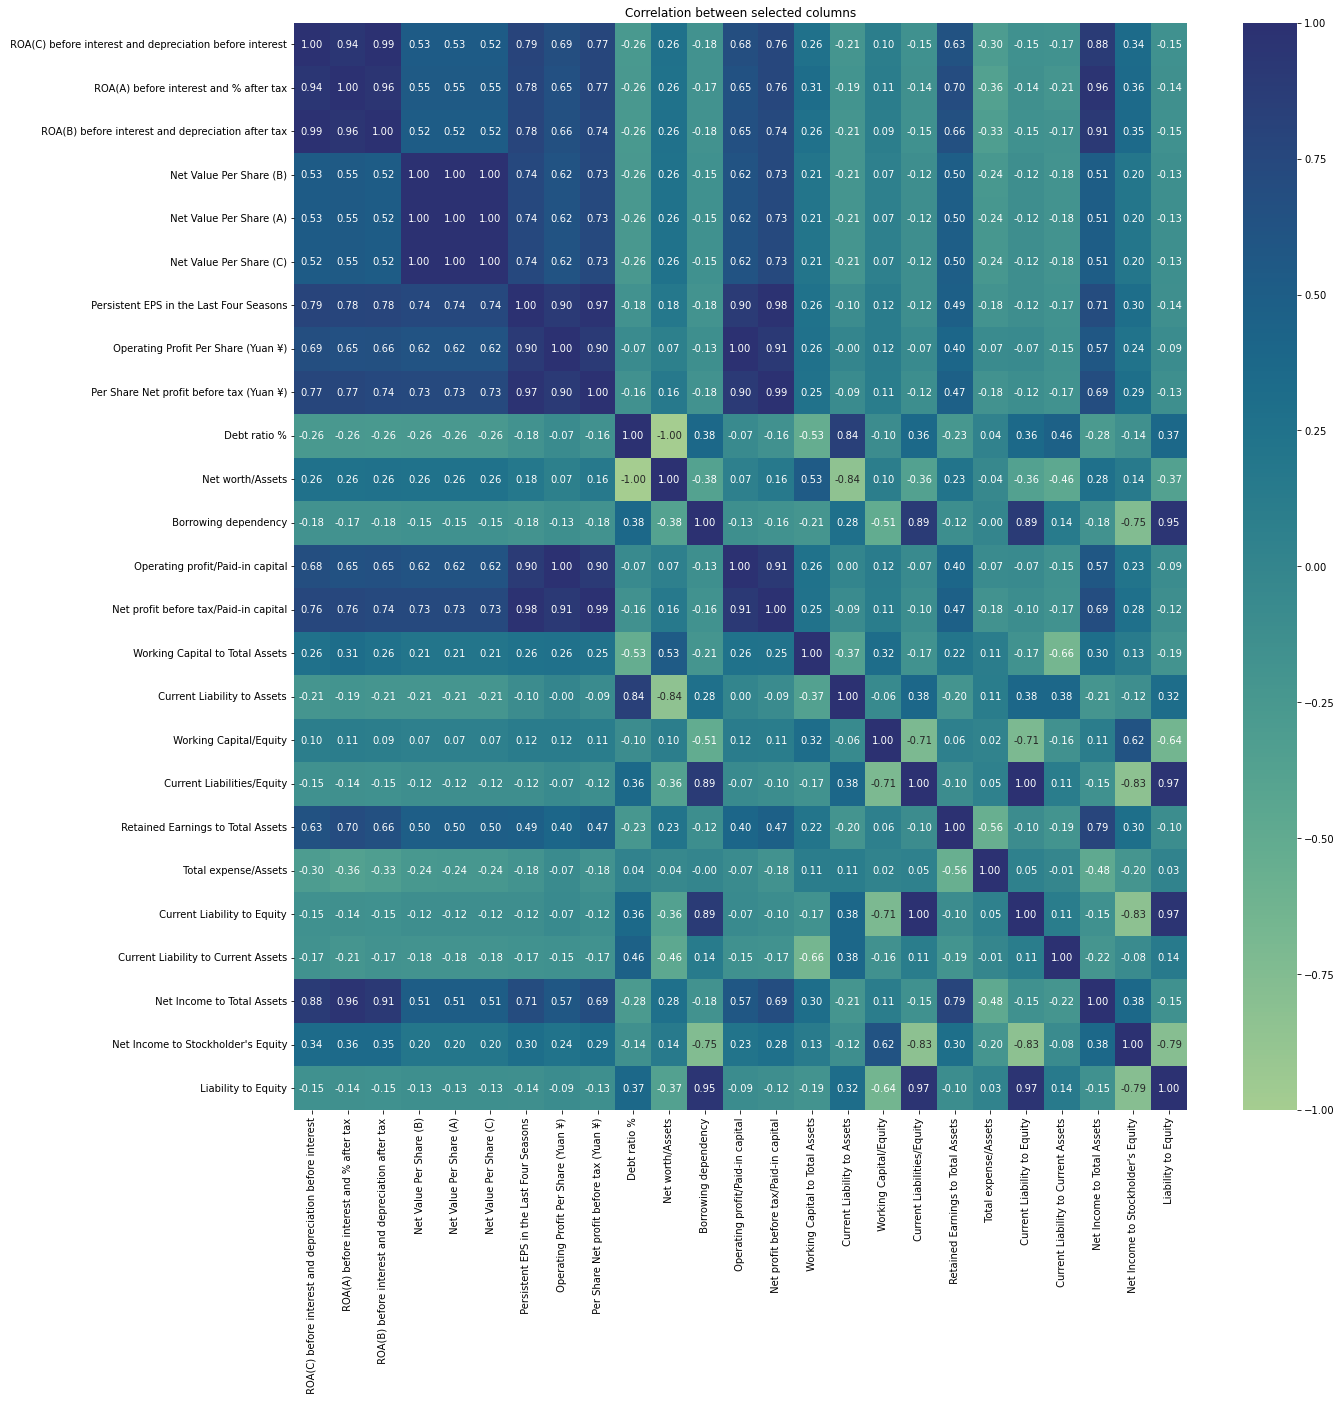

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(x_feat.corr(),cmap="crest",annot=True, fmt=".2f")
plt.title("Correlation between selected columns")
plt.show()

**interpretation**

- Drop columns with a correlation to others collumn = 1, because those columns cover same information

In [18]:
# Drop a column that have a high corelation within predictors
x_clean=x_feat.drop([' ROA(C) before interest and depreciation before interest',' ROA(B) before interest and depreciation after tax',' Net Value Per Share (B)',' Net Value Per Share (C)',' Operating profit/Paid-in capital',' Net profit before tax/Paid-in capital',' Debt ratio %',' Current Liabilities/Equity'],axis=1)

In [19]:
x_clean.columns

Index([' ROA(A) before interest and % after tax', ' Net Value Per Share (A)',
       ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net worth/Assets',
       ' Borrowing dependency', ' Working Capital to Total Assets',
       ' Current Liability to Assets', ' Working Capital/Equity',
       ' Retained Earnings to Total Assets', ' Total expense/Assets',
       ' Current Liability to Equity', ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity'],
      dtype='object')

### 4.2.2 Find Outlier

### 4.2.2.1 `ROA(A) before interest and % after tax`

#### **Return on Total Assets**

- ROA is a profitability ratio that indicates how profitable company in relation to its total assets
- Shown as a percentage and the higer ROA means a company is more efficient and productive at managing its balance sheet to generate profit


In [20]:
x_feat[' ROA(A) before interest and % after tax'].describe()

count    5455.000000
mean        0.557818
std         0.065355
min         0.000000
25%         0.535379
50%         0.559365
75%         0.587958
max         1.000000
Name:  ROA(A) before interest and % after tax, dtype: float64

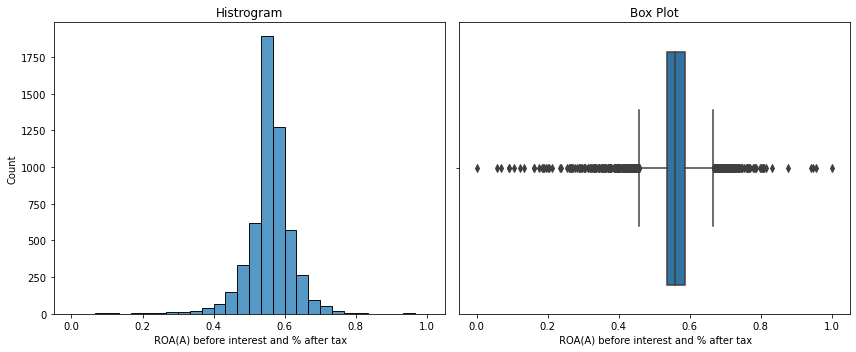

In [21]:
distribution_viz(' ROA(A) before interest and % after tax')

- It is looking normal
- there are lot of outlier on IQR 1
- The data doesn't need to be handling because the data could be in the range of 0 to 1

### 4.2.2.2. `Net Value Per Share (A)`

**Book Value per share**
- NAVPS represents the value per share of a mutual fund, ETF, or closed-end fund.
- Assets include the total market value of the fund's investments, cash and cash equivalents, receivables, and accrued income. Liabilities equal total short-term and long-term liabilities, plus all accrued expe

In [22]:
x_feat[' Net Value Per Share (A)'].describe()

count    5455.000000
mean        0.190028
std         0.031283
min         0.000000
25%         0.173486
50%         0.184063
75%         0.199149
max         0.549197
Name:  Net Value Per Share (A), dtype: float64

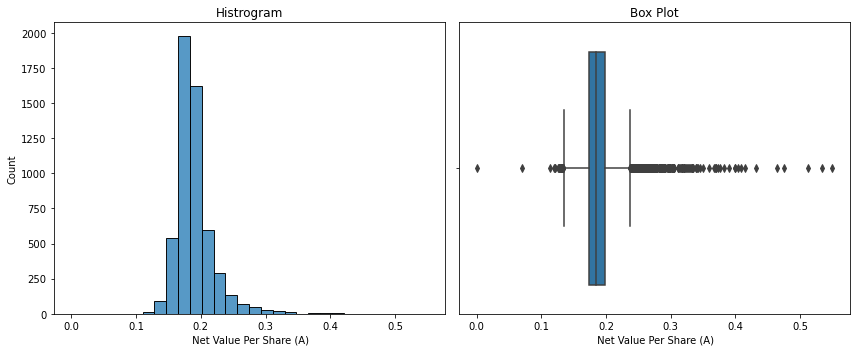

In [23]:
distribution_viz(' Net Value Per Share (A)')

### 4.2.2.3. `Persistent EPS in the Last Four Seasons`

**Earning per shares**

- Earning per shares are company net profit divided by total outstanding shares
- To found net profit per shares for company
- A higher EPS indicates greater value because investors will pay more for a company's shares if they think the company has higher profits relative to its share price

In [24]:
x_feat[' Persistent EPS in the Last Four Seasons'].describe()

count    5455.000000
mean        0.228321
std         0.031891
min         0.078567
25%         0.214617
50%         0.224260
75%         0.237875
max         1.000000
Name:  Persistent EPS in the Last Four Seasons, dtype: float64

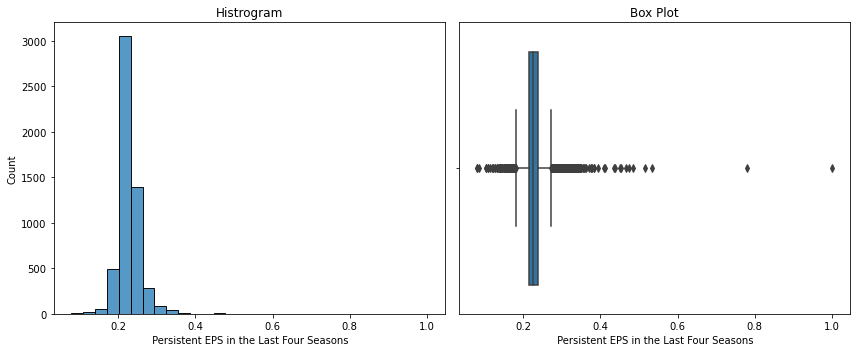

In [25]:
distribution_viz(' Persistent EPS in the Last Four Seasons')

### 4.2.2.4. `Operating Profit Per Share (Yuan ¥)`

**Operating Profit per shares**

-  Operating profit is its total earnings from its core business functions for a given period, excluding the deduction of interest and taxes,excludes any profits earned from ancillary investments, such as earnings from other businesses that a company has a part.
- Operating profit serves as a highly accurate indicator of a business's health because it removes all extraneous factors from the calculation
- Positive operating profit may express the overall health of a business, it does not guarantee future profitability

In [26]:
x_feat[' Operating Profit Per Share (Yuan ¥)'].describe()

count    5455.000000
mean        0.108779
std         0.027857
min         0.000000
25%         0.096083
50%         0.104145
75%         0.115707
max         1.000000
Name:  Operating Profit Per Share (Yuan ¥), dtype: float64

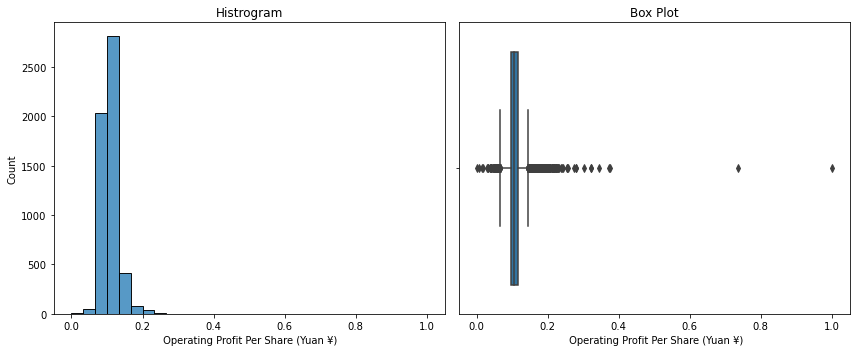

In [27]:
distribution_viz(' Operating Profit Per Share (Yuan ¥)')

### 4.2.2.5. `Per Share Net profit before tax (Yuan ¥)`

**Operating profit before tax**

-  Take the operating profit from the income statement and subtract any interest payments, then add any interest earned.

In [28]:
x_feat[' Per Share Net profit before tax (Yuan ¥)'].describe()

count    5455.000000
mean        0.183691
std         0.031246
min         0.009114
25%         0.170370
50%         0.179408
75%         0.192664
max         1.000000
Name:  Per Share Net profit before tax (Yuan ¥), dtype: float64

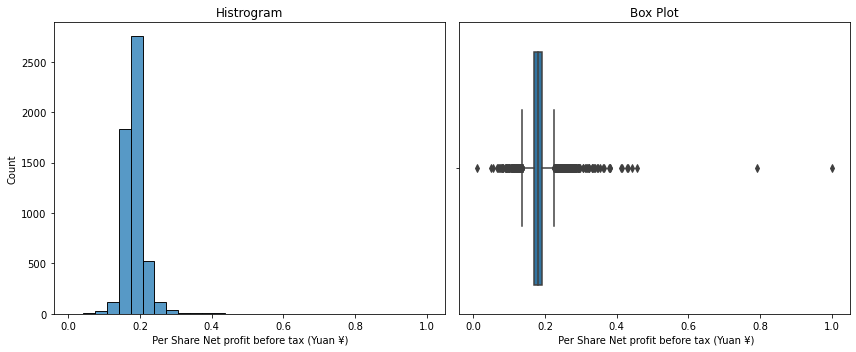

In [29]:
distribution_viz(' Per Share Net profit before tax (Yuan ¥)')

### 4.2.2.6.`Net worth/Assets`
---

**Net worth/Assets**

- Net worth is assets minus liabilities
- Assets is a resource with economic value that an individual, corporation, or country owns or controls with the expectation that it will provide a future benefit.
- A higher values indicate the greater results

In [30]:
x_feat[' Net worth/Assets'].describe()

count    5455.000000
mean        0.886750
std         0.054248
min         0.000000
25%         0.851060
50%         0.888593
75%         0.927140
max         1.000000
Name:  Net worth/Assets, dtype: float64

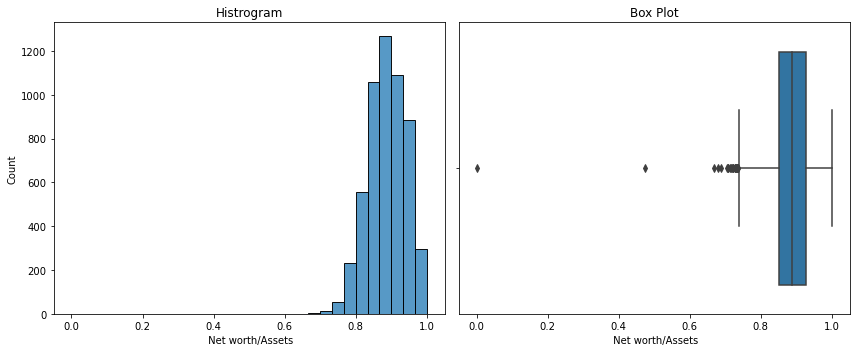

In [31]:
distribution_viz(' Net worth/Assets')

### 4.2.2.7.`Borrowing dependency`
---

**Cost of Interest-bearing Debt**

- Interest bearing debt: Debt comes in the form of loans or bond obligations that carry interest, whereas equity grants ownership and voting rights.


In [32]:
x_feat[' Borrowing dependency'].describe()

count    5455.000000
mean        0.374667
std         0.014313
min         0.187124
25%         0.370154
50%         0.372628
75%         0.376268
max         0.954819
Name:  Borrowing dependency, dtype: float64

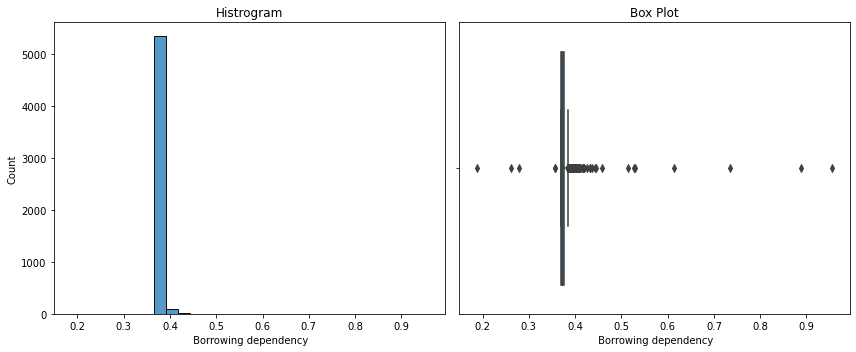

In [33]:
distribution_viz(' Borrowing dependency')

### 4.2.2.8.`Working Capital to Total Assets`
---

- Working capital is a financial metric that is the difference between a company's curent assets and current liabilities.
- working capital helps plan for future needs and ensure the company has enough cash and cash equivalents meet short-term obligations, such as unpaid taxes and short-term debt.
- The Working Capital to Total Assets ratio measures a company's ability to cover its short term financial obligations (Total Current Liabilities) by comparing its Total Current Assets to its Total Assets.


In [34]:
x_feat[' Working Capital to Total Assets'].describe()

count    5455.000000
mean        0.814216
std         0.059661
min         0.000000
25%         0.773674
50%         0.810124
75%         0.850925
max         1.000000
Name:  Working Capital to Total Assets, dtype: float64

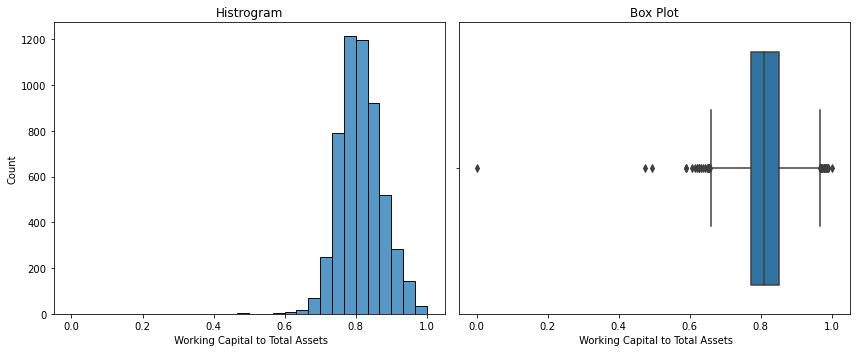

In [35]:
distribution_viz(' Working Capital to Total Assets')

### 4.2.2.9.`Current Liability to Assets`
---

- Current liabilities are a company’s short-term financial obligations that are due within one year or within a normal operating cycle. 
- Current assets are those that can be converted into cash within one year
- if the result is greater than 1, the output will be greater

In [36]:
x_feat[' Current Liability to Assets'].describe()

count    5455.000000
mean        0.090770
std         0.050803
min         0.000000
25%         0.053190
50%         0.082584
75%         0.119290
max         1.000000
Name:  Current Liability to Assets, dtype: float64

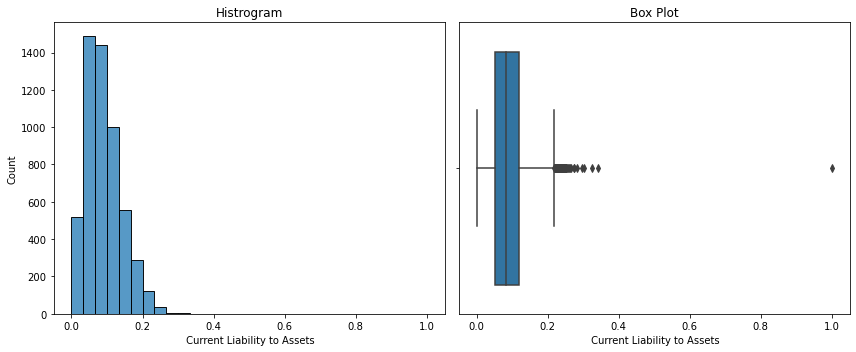

In [37]:
distribution_viz(' Current Liability to Assets')

### 4.2.2.10.`Working Capital/Equity`
---

- Working capital is a financial metric that is the difference between a company's curent assets and current liabilities.
- WC = Current Assets - Current Liabilities
- working capital helps plan for future needs and ensure the company has enough cash and cash equivalents meet short-term obligations, such as unpaid taxes and short-term debt.


In [38]:
x_feat[' Working Capital/Equity'].describe()

count    5455.000000
mean        0.735832
std         0.012404
min         0.000000
25%         0.733569
50%         0.736016
75%         0.738606
max         1.000000
Name:  Working Capital/Equity, dtype: float64

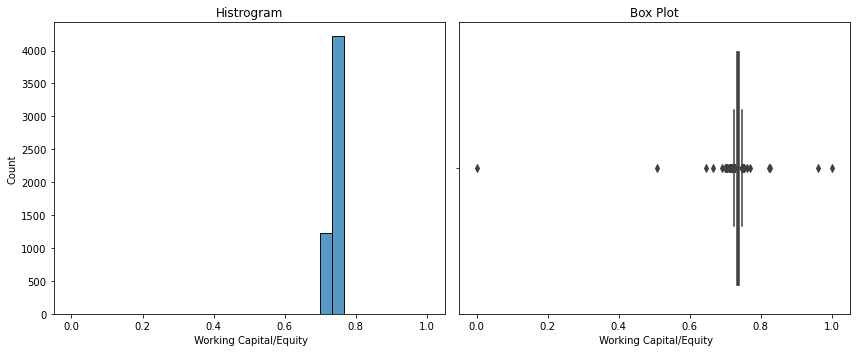

In [39]:
distribution_viz(' Working Capital/Equity')

### 4.2.2.11.`Retained Earnings to Total Assets`
---
- Retained earnings are the amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes and its dividends to shareholders. 
- This represents the portion of the company's equity that can be used, for instance, to invest in new equipment, R&D, and marketing.
- Divided with Total Assets to show the ratio compare to total assets

In [40]:
x_feat[' Retained Earnings to Total Assets'].describe()

count    5455.000000
mean        0.934526
std         0.026133
min         0.000000
25%         0.930842
50%         0.937552
75%         0.944605
max         0.998858
Name:  Retained Earnings to Total Assets, dtype: float64

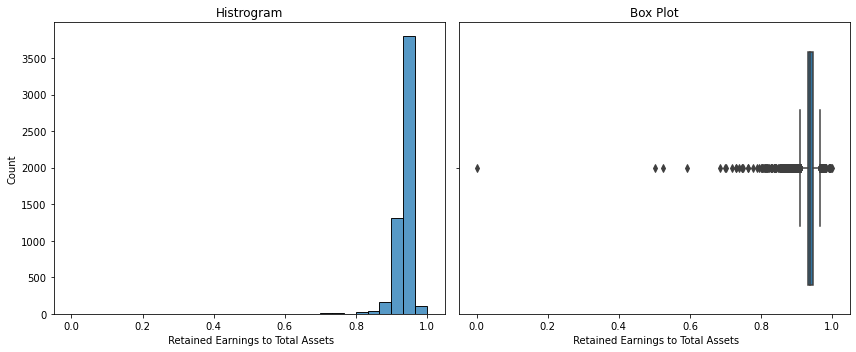

In [41]:
distribution_viz(' Retained Earnings to Total Assets')

### 4.2.2.12.`Total expense/Assets`
---
- Total expenses for a given period refer to the sum of all the total gross cash expenditures plus any subsidiary pending, such as operating expenses, incentive fees, interest, and taxes.

In [42]:
x_feat[' Total expense/Assets'].describe()

count    5455.000000
mean        0.029371
std         0.027623
min         0.000000
25%         0.014793
50%         0.022909
75%         0.035918
max         1.000000
Name:  Total expense/Assets, dtype: float64

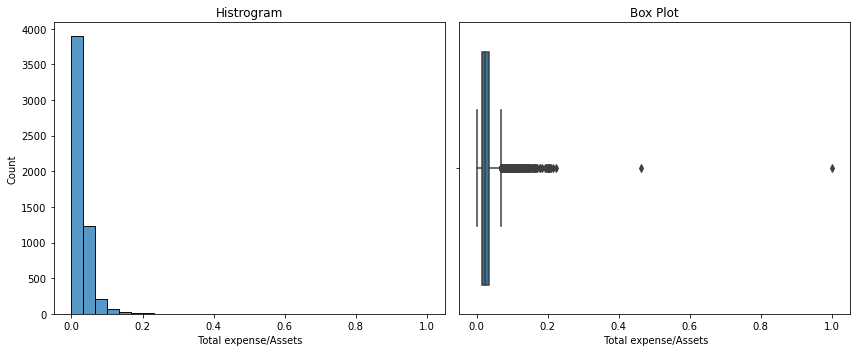

In [43]:
distribution_viz(' Total expense/Assets')

### 4.2.2.13.`Current Liability to Equity`
---
- Current liabilities (also called short-term liabilities) are debts a company must pay within a normal operating cycle, usually less than 12 months (as opposed to long-term liabilities, which are payable beyond 12 months). 
- Dived to Equity to find a ratio how much equity left the companies get to finished the current liabilities
- The best ratio is the one who got score below 2.0

In [44]:
x_feat[' Current Liability to Equity'].describe()

count    5455.000000
mean        0.331482
std         0.013245
min         0.153811
25%         0.328100
50%         0.329679
75%         0.332313
max         1.000000
Name:  Current Liability to Equity, dtype: float64

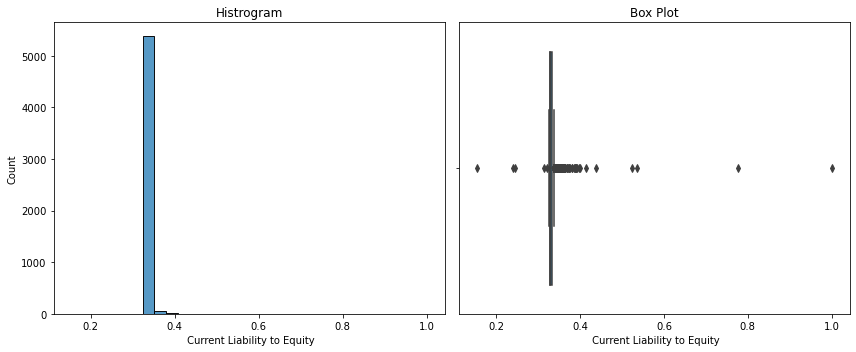

In [45]:
distribution_viz(' Current Liability to Equity')

### 4.2.2.14.`Current Liability to Current Assets`
---
- Compare shor-term Liability to Assets that expected reasonably to be sold


In [46]:
x_feat[' Current Liability to Current Assets'].describe()

count    5455.000000
mean        0.031427
std         0.029402
min         0.000000
25%         0.017894
50%         0.027630
75%         0.038528
max         1.000000
Name:  Current Liability to Current Assets, dtype: float64

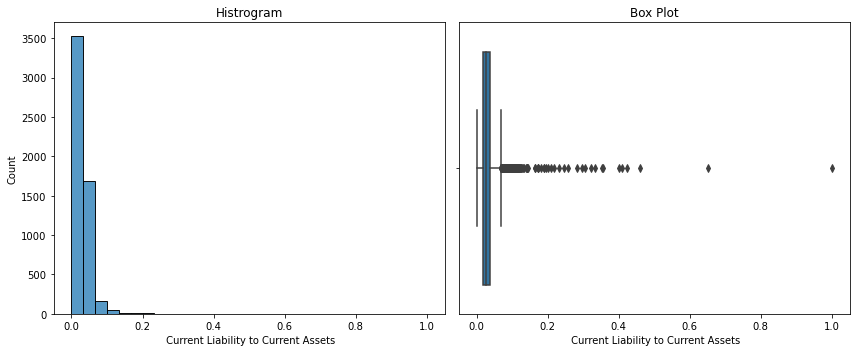

In [47]:
distribution_viz(' Current Liability to Current Assets')

### 4.2.2.15.`Net Income to Total Assets`
---
- Income generate compare to Total Assets that company have

In [48]:
x_feat[' Net Income to Total Assets'].describe()

count    5455.000000
mean        0.807420
std         0.039954
min         0.000000
25%         0.796642
50%         0.810357
75%         0.826091
max         1.000000
Name:  Net Income to Total Assets, dtype: float64

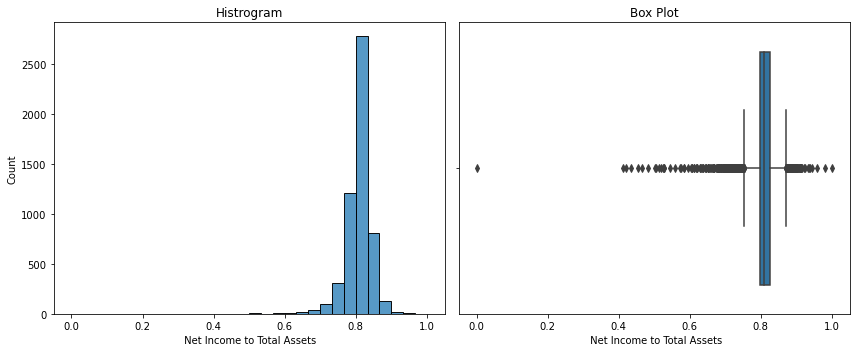

In [49]:
distribution_viz(' Net Income to Total Assets')

- To many Outliers, better we drop the collumns

### 4.2.2.16.`Net Income to Stockholder's Equity`
---

In [50]:
x_feat[" Net Income to Stockholder's Equity"].describe()

count    5455.000000
mean        0.840442
std         0.010817
min         0.344652
25%         0.840102
50%         0.841146
75%         0.842317
max         1.000000
Name:  Net Income to Stockholder's Equity, dtype: float64

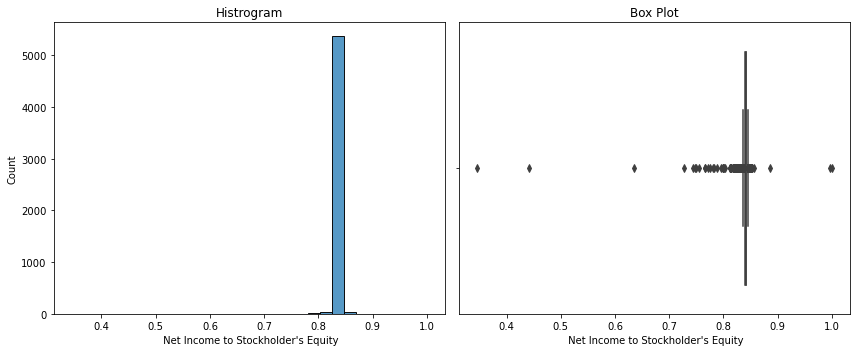

In [51]:
distribution_viz(" Net Income to Stockholder's Equity")

### 4.2.2.17.`Liability to Equity`
---

In [52]:
x_feat[' Liability to Equity'].describe()

count    5455.000000
mean        0.280410
std         0.013821
min         0.133503
25%         0.276944
50%         0.278779
75%         0.281470
max         1.000000
Name:  Liability to Equity, dtype: float64

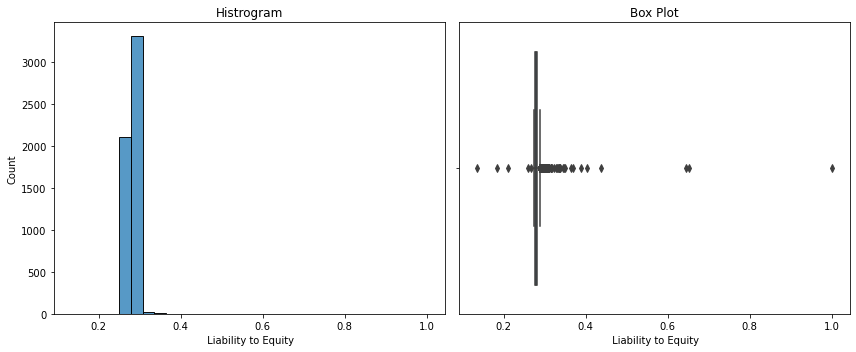

In [53]:
distribution_viz(' Liability to Equity')

- To many Outliers, better we drop the collumns

## 4.3 Summary
---

#### Handling Outlier
Persistent EPS in the Last Four Seasons | >0.7,


Operating Profit Per Share (Yuan ¥) | >0.7,


Per Share Net profit before tax (Yuan ¥)`| >0.7,


Net worth/Assets | < 0.6,


Borrowing dependency | >0,5|<Q3,


Working Capital to Total Assets | < 0.6,


Current Liability to Assets | > 0,3,


Working Capital/Equity | <0.6|>0.8,


Retained Earnings to Total Assets | <0.6,


Total expense/Assets | < 0.6,


Current Liability to Equity | > 0.4

In [54]:
joblib.dump(x_feat,'data split/X_train_feat.pkl')

['data split/X_train_feat.pkl']